<a href="https://colab.research.google.com/github/bhaskar4297/covid_19_analysis/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Define the problem: The first step is to clearly define the problem or question that needs to be answered. This may involve consulting with stakeholders to determine their goals and priorities.
Gather the data: Once the problem is defined, the next step is to gather the relevant data. This may involve collecting data from various sources, cleaning and pre-processing the data, and verifying the quality and accuracy of the data.
Explore the data: After the data is collected and cleaned, the next step is to explore it using statistical methods and visualization tools. This can help to identify patterns, trends, and relationships in the data.
Build the model: Once the data has been explored, the next step is to build a model that can predict or explain the phenomenon of interest. This may involve using machine learning algorithms, statistical models, or other techniques.
Evaluate the model: After the model is built, it needs to be evaluated to determine how well it performs. This may involve using metrics such as accuracy, precision, recall, and F1 score, among others.
Deploy the model: Once the model has been evaluated and deemed satisfactory, it can be deployed in the real world to make predictions or decisions. This may involve integrating the model into an existing software system or creating a new system to support the model.
Monitor and update the model: After the model is deployed, it needs to be monitored to ensure that it continues to perform well. This may involve collecting feedback from users, monitoring performance metrics, and updating the model as needed to improve its accuracy or effectiveness.
That's a basic overview of the data science project life cycle. Of course, there are many nuances and variations depending on the specific project and its requirements, but these are the main steps that are typically involved.


In [3]:
import pandas as pd

# Read the data from a CSV file
covid_data = pd.read_csv('covid_data.csv')


In [8]:
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,reproduction_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence
count,2.308600e+04,23086.000000,23086.00000,23086.000000,23086.000000,2.308500e+04,2.308500e+04,2.308500e+04,2.308500e+04,2.308500e+04,2.308500e+04,23085.000000,23084.000000,23084.000000
mean,9.984378e+05,2309.182968,2300.18587,10040.334055,12.619423,1.254587e+03,7.282108e+06,2.889266e+06,2.266937e+06,1.453262e+06,1.391118e+07,15.291890,9.853649,0.030611
std,2.453026e+06,9242.510708,8619.94622,27085.195867,50.380665,1.905040e+05,2.178558e+07,8.762845e+06,7.305690e+06,5.410154e+06,1.664796e+07,29.349842,14.128523,0.106394
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,-7.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.144289e+01,0.000000,0.000000,0.000000
25%,9.364000e+03,0.000000,11.42900,136.000000,0.000000,2.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.099890e+05,0.000000,0.287451,0.000000
50%,4.457550e+04,52.000000,75.00000,909.000000,0.000000,8.800000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.939617e+06,0.000000,4.657836,0.001276
75%,3.508895e+05,491.000000,577.28600,7546.500000,7.000000,1.120000e+00,1.616350e+05,6.604600e+04,0.000000e+00,0.000000e+00,2.617741e+07,5.502893,11.756584,0.018230
max,1.134770e+07,175271.000000,114018.14300,130458.000000,3351.000000,2.894470e+07,1.145485e+08,4.145833e+07,4.551032e+07,3.543293e+07,4.551032e+07,91.096543,65.676572,4.854960


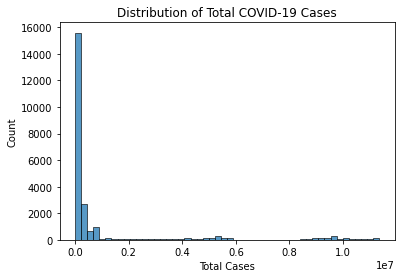

In [47]:
# Creating visualizations to understand the distribution and relationships between Total cases and count
import seaborn as sns

sns.histplot(covid_data['total_cases'], bins=50)
plt.xlabel('Total Cases')
plt.ylabel('Count')
plt.title('Distribution of Total COVID-19 Cases')
plt.show()

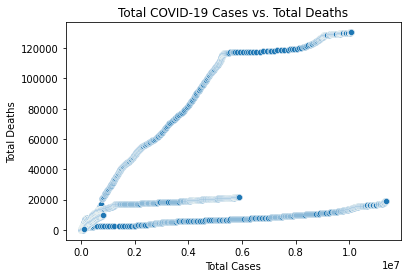

In [10]:
# creating scatter plots between total cases and total deaths
sns.scatterplot(x='total_cases', y='total_deaths', data=covid_data)
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Cases vs. Total Deaths')
plt.show()


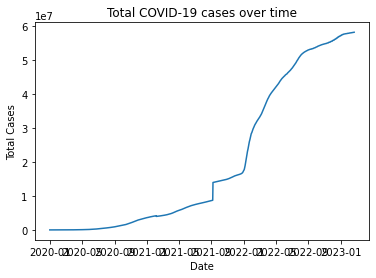

In [11]:
# time series analysis:
# Convert the date column to a datetime format
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Create a new dataframe with the total number of cases for each day
daily_cases = covid_data.groupby('date')['total_cases'].sum().reset_index()

# Create a line plot of the daily cases
plt.plot(daily_cases['date'], daily_cases['total_cases'])
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 cases over time')
plt.show()


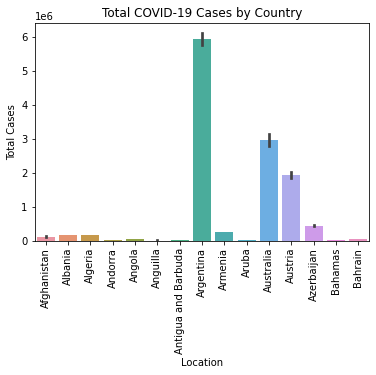

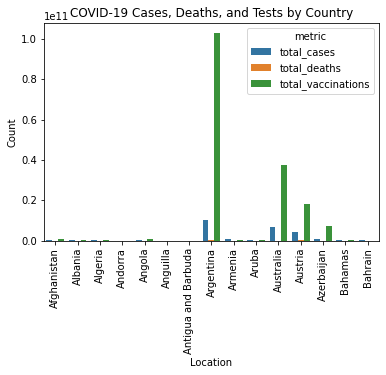

In [28]:
# Create a bar chart of total cases by country
sns.barplot(x='location', y='total_cases', data=covid_data)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Country')
plt.show()

# Create a stacked bar chart of cases, deaths, and tests by country
stacked_data = covid_data.groupby('location')[['total_cases', 'total_deaths','total_vaccinations']].sum().reset_index()
stacked_data = stacked_data.melt(id_vars='location', var_name='metric', value_name='count')
sns.barplot(x='location', y='count', hue='metric', data=stacked_data)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('COVID-19 Cases, Deaths, and Tests by Country')
plt.show()



In [33]:
covid_data['year']=pd.to_datetime(covid_data['date']).dt.strftime('%Y')
covid_data['year-month']=pd.to_datetime(covid_data['date']).dt.strftime('%Y-%b')
covid_data['month']=pd.to_datetime(covid_data['date']).dt.strftime('%b')
covid_data['day']=pd.to_datetime(covid_data['date']).dt.strftime('%d')
covid_data.head(10)

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,total_vaccinations,...,people_fully_vaccinated,total_boosters,population,vaccination_ratio,prevalence,incidence,year,year-month,month,day
0,Afghanistan,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000012,2020,2020-Feb,Feb,24
1,Afghanistan,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Feb,Feb,25
2,Afghanistan,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Feb,Feb,26
3,Afghanistan,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Feb,Feb,27
4,Afghanistan,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Feb,Feb,28
5,Afghanistan,2020-02-29,5.0,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Feb,Feb,29
6,Afghanistan,2020-03-01,5.0,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Mar,Mar,01
7,Afghanistan,2020-03-02,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Mar,Mar,02
8,Afghanistan,2020-03-03,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Mar,Mar,03
9,Afghanistan,2020-03-04,5.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,41128772.0,0.0,0.000012,0.000000,2020,2020-Mar,Mar,04


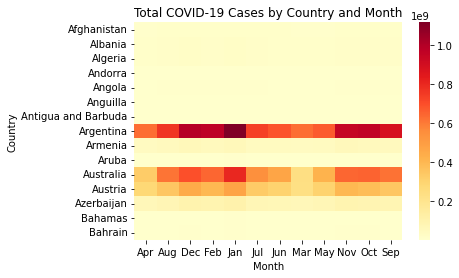

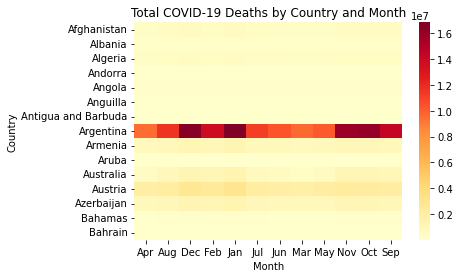

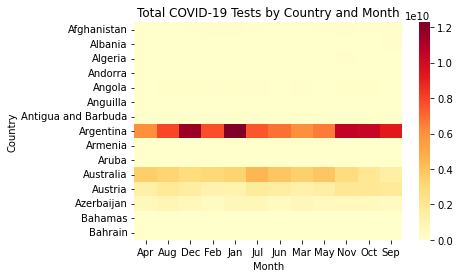

In [32]:
# Pivot the data to create a table of total cases, deaths, and tests by country and month
pivot_data = covid_data.pivot_table(index='location', columns='month', values=['total_cases', 'total_deaths','total_vaccinations'], aggfunc='sum')

# Create a heatmap of the total cases by country and month
sns.heatmap(pivot_data['total_cases'], cmap='YlOrRd')
plt.xlabel('Month')
plt.ylabel('Country')
plt.title('Total COVID-19 Cases by Country and Month')
plt.show()

# Create a heatmap of the total deaths by country and month
sns.heatmap(pivot_data['total_deaths'], cmap='YlOrRd')
plt.xlabel('Month')
plt.ylabel('Country')
plt.title('Total COVID-19 Deaths by Country and Month')
plt.show()

# Create a heatmap of the total tests by country and month
sns.heatmap(pivot_data['total_vaccinations'], cmap='YlOrRd')
plt.xlabel('Month')
plt.ylabel('Country')
plt.title('Total COVID-19 Tests by Country and Month')
plt.show()


In [45]:
import plotly.express as px
# Create a bar chart of population by location
fig = px.bar(covid_data, x='location', y='population')
fig.show()

Mean squared error: 8475686854759.153
Coefficient of determination: 0.3137887309541494


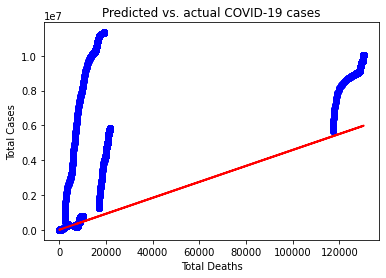

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
train_data = covid_data[covid_data['date'] < '2022-01-01']
test_data = covid_data[covid_data['date'] >= '2022-01-01']

# Train a linear regression model to predict the number of cases based on the number of deaths
X_train = train_data[['total_deaths']]
y_train = train_data['total_cases']
X_test = test_data[['total_deaths']]
y_test = test_data['total_cases']

model = LinearRegression()
model.fit(X_train, y_train)

# Predict the number of cases for the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Coefficient of determination:', r2)

# Visualize the predicted vs. actual cases using a scatter plot
plt.scatter(X_test['total_deaths'], y_test, color='blue')
plt.plot(X_test['total_deaths'], y_pred, color='red', linewidth=2)
plt.xlabel('Total Deaths')
plt.ylabel('Total Cases')
plt.title('Predicted vs. actual COVID-19 cases')
plt.show()
